<a href="https://colab.research.google.com/github/archajoshy/TSA/blob/main/AR_Model_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install statsmodels --upgrade 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
data=pd.read_csv('/content/daily-min-temperatures.csv',index_col='Date')
data

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


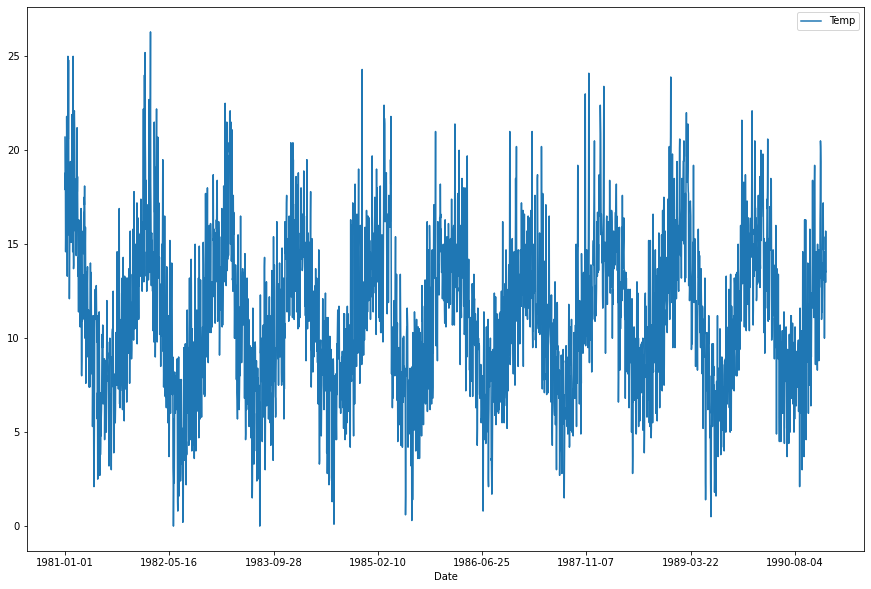

In [ ]:
from matplotlib import pyplot as plt
data.plot(figsize=(15,10))
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
data2=pd.read_csv('/content/daily-min-temperatures.csv',index_col='Date',squeeze=True)
X=data2.values
result=adfuller(X)

In [ ]:
data2

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [ ]:
result


(-4.444804924611696,
 0.0002470826300361034,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '10%': -2.56719413172842,
  '5%': -2.862336767636517},
 16642.822304301197)

In [ ]:
data

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


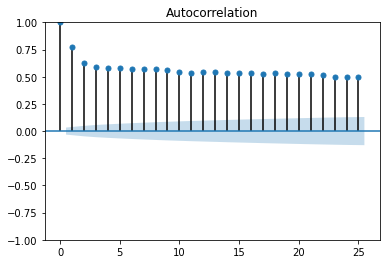

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data,lags=25)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


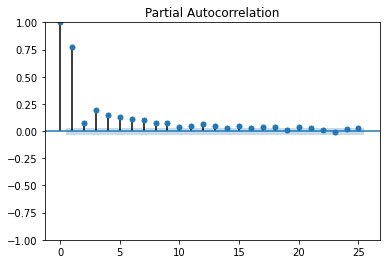

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data,lags=25)
plt.show()

In [ ]:
X=data.values

In [ ]:
X

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13. ]])

In [ ]:
train=X[:len(X)-7]
test=X[len(X)-7:]

In [ ]:
train

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.2],
       [13.9],
       [10. ]])

In [ ]:
test

array([[12.9],
       [14.6],
       [14. ],
       [13.6],
       [13.5],
       [15.7],
       [13. ]])

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
model=AutoReg(train,lags=13).fit()

In [ ]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(13)   Log Likelihood               -8352.772
Method:               Conditional MLE   S.D. of innovations              2.416
Date:                Sat, 04 Jun 2022   AIC                          16735.544
Time:                        18:17:09   BIC                          16828.499
Sample:                            13   HQIC                         16768.657
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7919      0.143      5.527      0.000       0.511       1.073
y.L1           0.6024      0.017     36.337      0.000       0.570       0.635
y.L2          -0.0861      0.019     -4.451      0.0

In [ ]:
print(len(train))

3643


In [ ]:
pred=model.predict(start=len(train),end=len(X)-1,dynamic=False)


[11.43535011 12.46987858 12.92667968 12.92616796 12.88723776 12.86719508
 12.89661204]


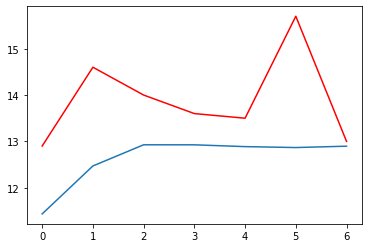

In [ ]:
plt.plot(pred)
plt.plot(test,color='red')
print(pred)
plt.show()

In [ ]:
test

array([[12.9],
       [14.6],
       [14. ],
       [13.6],
       [13.5],
       [15.7],
       [13. ]])

In [ ]:
pred

array([11.87216021, 13.05570396, 13.53180951, 13.24259049, 13.09156377,
       13.14608181, 13.17649241])

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))

In [ ]:
rmse

1.225253129889021